In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jb


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
cols = [
    "living_space",
    "floor_space",
    "type",
    "plot_area",
    "rooms",
    "zip_code",
    "last_refurbishment",
    "year_built",
    "price",
]

data = pd.read_csv(
    "https://github.com/Immobilienrechner-Challenge/data/blob/main/clean_v2.csv?raw=true",
    low_memory=False,
    usecols=cols,
)

data_plz = pd.read_parquet(
    "https://github.com/Immobilienrechner-Challenge/data/blob/main/plz_data.parquet?raw=true"
)

In [3]:
data = pd.get_dummies(data, columns=["type"])
data


,floor_space,last_refurbishment,living_space,plot_area,price,rooms,year_built,zip_code,type_attic-flat,type_attic-room,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,NaN,NaN,100.0,NaN,1150000.0,5.0,NaN,5023,0,0,...,1,0,0,0,0,0,0,0,0,0
1,242.0,NaN,156.0,222.0,1420000.0,5.0,NaN,5023,0,0,...,0,0,0,0,0,0,0,0,1,0
2,NaN,NaN,NaN,NaN,720000.0,5.0,NaN,5022,0,0,...,1,0,0,0,0,0,0,0,0,0
3,257.0,NaN,154.0,370.0,1430000.0,5.0,NaN,5023,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,142.0,NaN,995000.0,5.0,NaN,5022,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21408,NaN,2021.0,102.0,140.0,475000.0,4.5,1920.0,9470,0,0,...,0,0,0,0,0,0,0,0,0,0
21409,NaN,NaN,250.0,NaN,1490000.0,5.5,2022.0,9500,0,0,...,0,0,0,0,0,1,0,0,0,0
21410,NaN,2021.0,240.0,455.0,1450000.0,5.5,1966.0,9500,0,0,...,0,0,0,0,0,0,0,0,0,0
21411,NaN,NaN,175.0,NaN,1290000.0,5.5,2022.0,9548,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
all_cols = data.columns.append(data_plz.columns)
all_cols


Index(['floor_space', 'last_refurbishment', 'living_space', 'plot_area',
       'price', 'rooms', 'year_built', 'zip_code', 'type_attic-flat',
       'type_attic-room', 'type_castle', 'type_chalet', 'type_detached-house',
       'type_detached-secondary-suite', 'type_duplex-maisonette',
       'type_farmhouse', 'type_flat', 'type_furnished-residential-property',
       'type_loft', 'type_penthouse', 'type_rustico', 'type_secondary-suite',
       'type_semi-detached-house', 'type_single-room',
       'type_stepped-apartment', 'type_stepped-house', 'type_studio',
       'type_terrace-house', 'type_villa', 'gde_average_house_hold',
       'NoisePollutionRoadS', 'PopulationDensityM', 'NoisePollutionRoadL',
       'gde_workers_sector1', 'ForestDensityL', 'ForestDensityM', 'gde_tax',
       'gde_politics_sp', 'gde_social_help_quota', 'RiversAndLakesS',
       'NoisePollutionRoadM', 'gde_private_apartments', 'ForestDensityS',
       'distanceToTrainStation', 'NoisePollutionRailwayM', 'gde_wor

In [5]:
data_plz


,gde_average_house_hold,NoisePollutionRoadS,PopulationDensityM,NoisePollutionRoadL,gde_workers_sector1,ForestDensityL,ForestDensityM,gde_tax,gde_politics_sp,gde_social_help_quota,...,gde_empty_apartments,WorkplaceDensityS,gde_area_agriculture_percentage,gde_politics_rights,gde_politics_fdp,PopulationDensityS,gde_politics_gps,gde_workers_sector2,Latitude,gde_politics_svp
PLZ,,,,,,,,,,,,,,,,,,,,,
1000,1.970000,0.414153,0.240151,0.428046,145.000000,0.285953,0.175767,9.070000,30.826607,8.784994,...,0.376880,0.090530,16.065812,0.533537,18.645717,0.301469,15.911228,6470.000000,46.552270,15.363312
1001,1.970000,0.475540,0.394306,0.440235,145.000000,0.166444,0.109147,9.070000,30.826607,8.784994,...,0.376880,0.361649,16.065812,0.533537,18.645717,0.383178,15.911228,6470.000000,46.540034,15.363312
1002,1.970000,0.532555,0.481231,0.454635,145.000000,0.086067,0.062193,9.070000,30.826607,8.784994,...,0.376880,0.559333,16.065812,0.533537,18.645717,0.401553,15.911228,6470.000000,46.531449,15.363312
1003,1.970000,0.686118,0.473086,0.506682,145.000000,0.001464,0.000000,9.070000,30.826607,8.784994,...,0.376880,0.858643,16.065812,0.533537,18.645717,0.203338,15.911228,6470.000000,46.520300,15.363312
1004,1.970000,0.343831,0.738602,0.377132,145.000000,0.055385,0.073004,9.070000,30.826607,8.784994,...,0.376880,0.429517,16.065812,0.533537,18.645717,0.898066,15.911228,6470.000000,46.532926,15.363312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.315956,0.269094,0.293460,0.205645,42.080888,0.205606,0.094631,5.572633,13.244545,1.080267,...,1.371213,0.132509,47.600989,0.484256,18.587304,0.405154,4.344102,136.554322,47.352149,39.803002
9996,2.315980,0.269072,0.293375,0.205607,42.089663,0.205634,0.094664,5.572649,13.245363,1.080423,...,1.370858,0.132523,47.602514,0.484209,18.586365,0.405125,4.344293,136.557243,47.352143,39.802231
9997,2.316003,0.269052,0.293296,0.205571,42.097849,0.205661,0.094694,5.572665,13.246129,1.080570,...,1.370526,0.132537,47.603933,0.484166,18.585485,0.405098,4.344471,136.560028,47.352138,39.801507


In [6]:
data = data.merge(data_plz, left_on="zip_code", right_on="PLZ", how="left")
data


,floor_space,last_refurbishment,living_space,plot_area,price,rooms,year_built,zip_code,type_attic-flat,type_attic-room,...,gde_empty_apartments,WorkplaceDensityS,gde_area_agriculture_percentage,gde_politics_rights,gde_politics_fdp,PopulationDensityS,gde_politics_gps,gde_workers_sector2,Latitude,gde_politics_svp
0,NaN,NaN,100.0,NaN,1150000.0,5.0,NaN,5023,0,0,...,1.994681,0.098951,30.676329,0.220264,18.355360,0.366674,7.066814,9.0,47.415927,30.809471
1,242.0,NaN,156.0,222.0,1420000.0,5.0,NaN,5023,0,0,...,1.994681,0.098951,30.676329,0.220264,18.355360,0.366674,7.066814,9.0,47.415927,30.809471
2,NaN,NaN,NaN,NaN,720000.0,5.0,NaN,5022,0,0,...,0.691563,0.084036,33.137090,0.892332,19.158429,0.291828,7.477959,349.0,47.404069,27.590168
3,257.0,NaN,154.0,370.0,1430000.0,5.0,NaN,5023,0,0,...,1.994681,0.098951,30.676329,0.220264,18.355360,0.366674,7.066814,9.0,47.415927,30.809471
4,NaN,NaN,142.0,NaN,995000.0,5.0,NaN,5022,0,0,...,0.691563,0.084036,33.137090,0.892332,19.158429,0.291828,7.477959,349.0,47.404069,27.590168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21408,NaN,2021.0,102.0,140.0,475000.0,4.5,1920.0,9470,0,0,...,1.853960,0.217520,37.178683,2.391357,15.832119,0.430318,4.497451,1695.0,47.161941,33.843166
21409,NaN,NaN,250.0,NaN,1490000.0,5.5,2022.0,9500,0,0,...,2.680361,0.366572,57.602820,1.415174,11.185970,0.556964,5.054677,2640.0,47.464271,41.828893
21410,NaN,2021.0,240.0,455.0,1450000.0,5.5,1966.0,9500,0,0,...,2.680361,0.366572,57.602820,1.415174,11.185970,0.556964,5.054677,2640.0,47.464271,41.828893
21411,NaN,NaN,175.0,NaN,1290000.0,5.5,2022.0,9548,0,0,...,4.690117,0.045863,57.068742,2.366864,6.558185,0.321902,4.462525,474.0,47.524154,44.945759


In [7]:
X_cols = data.columns.drop("price")

scaler = StandardScaler().fit(data[X_cols])
X = pd.DataFrame(scaler.transform(data[X_cols], ), columns=X_cols)
y = data["price"]

In [8]:
X


,floor_space,last_refurbishment,living_space,plot_area,rooms,year_built,zip_code,type_attic-flat,type_attic-room,type_castle,...,gde_empty_apartments,WorkplaceDensityS,gde_area_agriculture_percentage,gde_politics_rights,gde_politics_fdp,PopulationDensityS,gde_politics_gps,gde_workers_sector2,Latitude,gde_politics_svp
0,NaN,NaN,-0.511650,NaN,-0.013692,NaN,0.567807,-0.180137,-0.02368,-0.016742,...,0.118255,-0.406746,-0.248328,-0.576154,-0.307367,0.131456,0.110021,-0.492965,1.597782,0.526697
1,0.235835,NaN,0.001688,-0.234941,-0.013692,NaN,0.567807,-0.180137,-0.02368,-0.016742,...,0.118255,-0.406746,-0.248328,-0.576154,-0.307367,0.131456,0.110021,-0.492965,1.597782,0.526697
2,NaN,NaN,NaN,NaN,-0.013692,NaN,0.567398,-0.180137,-0.02368,-0.016742,...,-0.687355,-0.495768,-0.117444,-0.482444,-0.219358,-0.262025,0.222456,-0.366421,1.573663,0.237642
3,0.309977,NaN,-0.016646,-0.200157,-0.013692,NaN,0.567807,-0.180137,-0.02368,-0.016742,...,0.118255,-0.406746,-0.248328,-0.576154,-0.307367,0.131456,0.110021,-0.492965,1.597782,0.526697
4,NaN,NaN,-0.126647,NaN,-0.013692,NaN,0.567398,-0.180137,-0.02368,-0.016742,...,-0.687355,-0.495768,-0.117444,-0.482444,-0.219358,-0.262025,0.222456,-0.366421,1.573663,0.237642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21408,NaN,0.802596,-0.493316,-0.254214,-0.292047,-1.153334,2.387250,-0.180137,-0.02368,-0.016742,...,0.031258,0.300922,0.097522,-0.273425,-0.583893,0.466048,-0.592615,0.134544,1.081189,0.799085
21409,NaN,NaN,0.863361,NaN,0.264662,0.597802,2.399524,-0.180137,-0.02368,-0.016742,...,0.542154,1.190528,1.183851,-0.409541,-1.093073,1.131856,-0.440232,0.486261,1.696112,1.516106
21410,NaN,0.802596,0.771694,-0.180179,0.264662,-0.363606,2.399524,-0.180137,-0.02368,-0.016742,...,0.542154,1.190528,1.183851,-0.409541,-1.093073,1.131856,-0.440232,0.486261,1.696112,1.516106
21411,NaN,NaN,0.175856,NaN,0.264662,0.597802,2.419163,-0.180137,-0.02368,-0.016742,...,1.784620,-0.723602,1.155444,-0.276840,-1.600239,-0.103921,-0.602166,-0.319898,1.817910,1.795962


In [9]:
y


0        1150000.0
1        1420000.0
2         720000.0
3        1430000.0
4         995000.0
           ...    
21408     475000.0
21409    1490000.0
21410    1450000.0
21411    1290000.0
21412     780000.0
Name: price, Length: 21413, dtype: float64

In [10]:
def histgradientboosting_regression_gridsearchCV(
    X,
    y,
    learning_rate=[0.1],
    max_depth=[6],
    cv=5,
    verbose=1,
    n_jobs=8,
):
    # create histgradientboosting Modell with gridsearch cv
    histgradientboosting = HistGradientBoostingRegressor()

    # create parameter grid
    param_grid = {
        "loss": ["absolute_error"],
        "learning_rate": learning_rate,
        "random_state": [42],
        "max_depth": max_depth,
        "max_leaf_nodes": [None],
    }

    # create gridsearchcv model
    histgradientboosting_grid = GridSearchCV(
        histgradientboosting,
        param_grid,
        cv=cv,
        n_jobs=n_jobs,
        scoring="neg_mean_absolute_percentage_error",
        verbose=verbose,
    )

    # fit the model
    histgradientboosting_grid.fit(X, np.log(y))

    # print the best parameters
    print("Best parameters:", histgradientboosting_grid.best_params_)

    return histgradientboosting_grid


In [11]:
model = histgradientboosting_regression_gridsearchCV(
    X,
    y,
    cv=4,
    learning_rate=[0.1],
    max_depth=[33],
    verbose=1,
    n_jobs=4,
)


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best parameters: {'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 33, 'max_leaf_nodes': None, 'random_state': 42}


MAPE: 11.76%


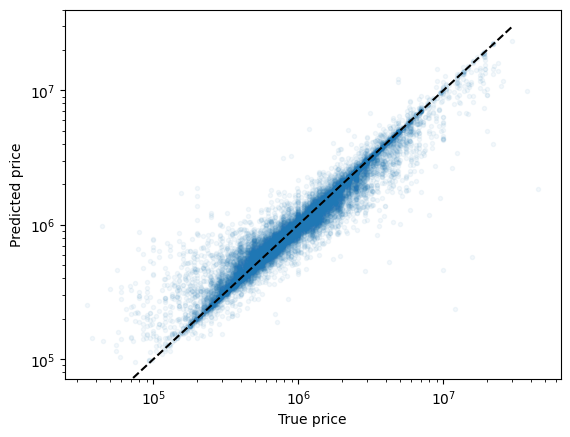

In [12]:
pred = np.exp(model.predict(X))
plt.plot(y, pred, ".", alpha=0.05)
plt.plot([0, 3e7], [0, 3e7], "k--")
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.xscale("log")
plt.yscale("log")

print(f"MAPE: {mean_absolute_percentage_error(y, pred) * 100:.2f}%")


In [13]:
jb.dump(scaler, "scaler_histgradientboostingregressor.joblib")
jb.dump(model, "model_histgradientboostingregressor.joblib")
scaler = None
model = None
scaler = jb.load("scaler_histgradientboostingregressor.joblib")
model = jb.load("model_histgradientboostingregressor.joblib")


In [14]:
def predict(living_space=None,
            floor_space=None,
            type_=None,
            plot_area=None,
            rooms=None,
            zip_code=None,
            last_refurbishment=None,
            year_built=None,
            cols=None):

    prediction_df = pd.DataFrame(columns=cols, index=[0])

    if living_space:
        prediction_df["living_space"] = living_space
    if floor_space:
        prediction_df["floor_space"] = floor_space
    if type_:
        for col in prediction_df.columns:
            if "type_" in col:
                prediction_df[col] = 0
        prediction_df[f"type_{type_}"] = 1
    if plot_area:
        prediction_df["plot_area"] = plot_area
    if rooms:
        prediction_df["rooms"] = rooms
    if zip_code:
        prediction_df["zip_code"] = zip_code
        # fill with data from plz
        prediction_df[data_plz.columns] = data_plz.loc[zip_code]
    if last_refurbishment:
        prediction_df["last_refurbishment"] = last_refurbishment
    if year_built:
        prediction_df["year_built"] = year_built

    prediction_df = pd.DataFrame(scaler.transform(
        prediction_df[prediction_df.columns]), columns=prediction_df.columns)

    # predict
    prediction = np.exp(model.predict(prediction_df))[0]

    # rules
    prediction = np.round(prediction, -3)
    prediction = np.max([0, prediction])
    prediction = np.min([prediction, 3e7])
    return prediction
    

In [15]:
predict(living_space=100, floor_space=None, type_="flat", plot_area=None,
        rooms=4, zip_code=8050, last_refurbishment=2020, year_built=2010, cols=X_cols)
        

1247000.0